# **INFLATION INFERENCE (ML regression technique)**

 Inflation means a sustained increase in the general price level of goods and services. Money supply refers to the total amount of money circulating in an economy including cash, deposits, and other liquid assets. the relationship between them is When money supply grows faster than the economy’s output, inflation tends to rise and lets not forget that the major revenue generation of nigeria(Crude oil) is also a factor in general price increase of goods and services in the country. Monetary policy rates(MPR), Lending rates, treasury bills etc are all included in the inferential analysis.

 These project involves merging Inflation, crude oil, MPR, money supply.. etc for descriptive and infefrential analysis on price of goods and services in Nigeria which aims at enabling measurable/quantified decision making to achieve macro economic goals based on the data given. It also aims at understanding the relationship between the variables for contractionery and expansionary approaches in monetary policy.

 note that stocastic variables like disease outbreak,war, etc...influences a model's accuracy on future predictions to unseen data and exchange rate which is another factor that influences inflation is not included because the exchange rate data available on the CBN platform is minimal compared to the datas picked for this project. Also, machine learning algorithms performs well on more data.
  

Data was gotten from [Central Bank Of Nigeria(CBN)](https://www.cbn.gov.ng/rates/).

- Inflation data ---> [Inflation Rate(CBN)](https://www.cbn.gov.ng/rates/inflrates.html)
- Money supply ----> [Money and Credit Statistics](https://www.cbn.gov.ng/rates/mnycredit.html).
- Crude Oil -----> [Crude Oil Price](https://www.cbn.gov.ng/rates/crudeoil.html).
- Money Market-----> [Money Market Indicators](https://www.cbn.gov.ng/rates/mnymktind.html).


The goal of this project is to estimate Inflation given money supply and crude oil variables.

**Evaluation Metrics For Regression Models**

Evaluation metrics are quantitative measurements that assess how well a model performs. e.g F1-score, Recall, Accuracy, Precision for Classification problem and MAE, MSE, RMSE, RMSLE... for Regression problem.

Here are the key evaluation metrics used in regression analysis:

****R-Squared (R²) – Coefficient of Determination****

Measures how well the model explains the variance in the dependent variable/target variable and it ranges from 0 to 1 (or negative if the model is worse than a simple mean prediction).

- R² = 1: Perfect fit.
- R² = 0: Model explains nothing beyond the mean.
- Negative R²: Model is worse.

coeffecient of determination is best for assessing the overall model fit.
Not useful when data has outliers or a nonlinear relationship.

****Mean Absolute Error (MAE)****

Measures the average absolute difference between actual and predicted values, lower MAE means better predictions. Gives equal weight to all errors,useful when you want a simple, interpretable metric that directly shows the average prediction error in real units (e.g., dollars, temperature).

****Mean Squared Error (MSE)****

Measures the average squared difference between actual and predicted values. Squaring penalizes larger errors more, making it sensitive to outliers. But it is not directly interpretable, as it’s in squared units.

**Root Mean Squared Error (RMSE)**

Measures the average squared error and takes the square root to bring it back to the same scale as the original data. Used when absolute errors matter (e.g., predicting house prices, sales revenue).

**Root Mean Squared Logarithmic Error (RMSLE)**

Takes the log of the average difference bteween the actual and predicted values before computing the error.
Penalizes under-predictions more than over-predictions.
Handles large ranges and outliers better than RMSE.

*RMSLE is better when predicting growth-based values or handling small values fairly(e.g., sales, population, startup revenue, number of daily website visitors)
The best evaluation metric for this project might be RMSE OR RMSLE depending on the outlier effect.*


# Steps taken in the project

- Exploratory data analysis (EDA): The process of going through a dataset and discovering more about it.

- Model training: Create model(s) to learn to predict a target/dependent variable based on other independent variables.

- Model evaluation: Evaluating a model's predictions using problem-specific evaluation metrics(e.g MAE/MSE/RMSE/RMSLE...)

- Model comparison: Comparing several different models to find the best one.(i might use one model because of computation time).

- Model hyperparameter tuning: Once we've found a good model, can we tweak its hyperparameters to improve it?

- Feature importance: it answers question like, are there some features/characteristics that are more important for prediction?. this is necessary to know why the model makes it decision and what variables contributed to its estimates.(for explainability)

- Cross-validation: If we do build a good model, can we be sure it will work on unseen data?

- Reporting what we've found: If we had to present our work, what would we show someone?

# Proof Of Concept(POC)

A proof of concept (POC) is a small-scale test that shows if a new idea or design is feasible. It's used to demonstrate that a project is viable before committing too many resources.

Therefore the POC for this project is if we can reach a coeffecient of determination(R squared) between 0.7 and 0.8, we will pursue this project(i.e i will deploy it on streamlit community cloud for public use and notebook will be set to public on my Github repository).

# 1. Exploratory data analysis (EDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
print(f"This notebook was last updated: {datetime.datetime.now()}")

This notebook was last updated: 2025-10-08 10:11:12.347608


In [2]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ls! /content/drive/MyDrive

ls: cannot access '!': No such file or directory
/content/drive/MyDrive:
 6-step-ml-framework.png
 Anaconda3-2024.10-1-Windows-x86_64.exe
 car-sales-extended-missing-data.csv
 Car-sales-missing-dropped.csv
'Colab Notebooks'/
 creditcard.csv
 Credit-card.ipynb
'credit card sample.csv'
'credit test.csv'
 Crude_Oil_Data_in_Excel.csv
 data_description.txt
 day1_practice.ipynb
 day1-selenium-for-javascript-sites.ipynb
'day2 copy solution.ipynb'
'day2 practice.ipynb'
 end-to-end-bluebook-bulldozer-price-regression.ipynb
 end-to-end-heart-disease-classification-checkpoint.ipynb
 end-to-end-heart-disease-classification.ipynb
'eval test clean.csv'
'Evaluation and test data.csv'
 Example_notebook.ipynb
 Git-2.47.1-64-bit.exe
 gs_random_forest.pk1
 gs_rf.pk1
 Hosuing_validation_data.csv
 housing.ipynb
 Housing_train_data.csv
 inflation_app/
 Inflation_Data_in_Excel.csv
 inflation_inference_app.py
 inflation_model.pkl
 Introduction-to-matplotlib.ipynb
 Introduction-to-numpy.ipynb
 Introduction_to_

In [4]:
import pandas as pd
inflation_df = pd.read_csv('/content/drive/MyDrive/Inflation_Data_in_Excel.csv')
money_supply_df = pd.read_csv('/content/drive/MyDrive/Money_and_Credit_Statistics_Data_in_Excel.csv', na_values="-")
crude_oil_df = pd.read_csv('/content/drive/MyDrive/Crude_Oil_Data_in_Excel.csv')
money_market_df = pd.read_csv('/content/drive/MyDrive/Money_Market_Indicators_Data_in_Excel.csv')


In [5]:
inflation_df.head()

,tyear,tmonth,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,allItemsLessFrmProdAndEnergyAvg
0,2025,8,August 2025,20.12,24.66,21.87,25.75,20.10,22.77,20.33,23.04
1,2025,7,July 2025,21.88,25.65,22.74,26.97,21.38,23.29,21.33,23.63
2,2025,6,June 2025,22.22,26.60,21.97,28.28,22.43,23.69,22.76,24.14
3,2025,5,May 2025,22.97,27.55,21.14,29.80,23.28,24.02,22.28,24.51
4,2025,4,April 2025,23.71,28.46,21.26,31.43,24.50,24.27,23.39,24.91


In [6]:
crude_oil_df.head()

,tyear,tmonth,period,crudeOilPrice,domProd,crudeOilExp
0,2025,7,July 2025,73.18,1.51,1.06
1,2025,6,June 2025,73.50,1.51,1.06
2,2025,5,May 2025,65.90,1.45,1.00
3,2025,4,April 2025,69.07,1.49,1.04
4,2025,3,March 2025,74.44,1.40,0.95


In [7]:
money_supply_df.head()

,tyear,tmonth,period,moneySupply_M3,cbnBills,moneySupply_M2,quasiMoney,narrowMoney,currencyOutsideBanks,demandDeposits,...,netDomesticCredit,creditToGovernment,creditToGovernmentFed,mirrorAccounts,creditToPrivateSector,otherAssetsNet,baseMoney,currencyInCirculation,bankReserves,specialInterventionReserves
0,2025,8,August 2025,1.195226e+08,9288.99,1.195133e+08,80214026.43,39299316.23,4453360.01,34845956.23,...,9.896767e+07,23133209.07,0.0,0.0,75834458.55,4969679.65,35680432.94,4922360.53,30758072.40,284361.95
1,2025,6,June 2025,1.172507e+08,10805.40,1.172399e+08,77375835.57,39864101.77,4493787.77,35370313.99,...,9.778786e+07,21662004.62,0.0,0.0,76125855.69,3187029.68,34659417.19,5007516.17,29651901.02,284361.95
2,2025,5,May 2025,1.192044e+08,13239.94,1.191912e+08,78679155.05,40512034.69,4633853.89,35878180.80,...,1.009553e+08,22988130.03,0.0,0.0,77967127.85,8294832.02,35879310.16,5014793.27,30864516.89,284361.95
3,2025,4,April 2025,1.192217e+08,22936.03,1.191987e+08,78218934.98,40979779.15,4568096.14,36411683.01,...,1.020027e+08,23934952.13,0.0,0.0,78067729.00,11679368.65,34735312.55,5014849.02,29720463.52,284361.95
4,2025,3,March 2025,1.158152e+08,20807.61,1.157944e+08,75814189.75,39980197.60,4597915.18,35382282.40,...,1.005710e+08,24589403.51,0.0,0.0,75981573.01,15797020.30,33526317.75,5002769.32,28523548.43,284361.95


In [8]:
money_market_df.head()

,tyear,tmonth,period,interBankCallRate,mrr,mpr,treasuryBill,savingsDeposit,oneMonthDeposit,threeMonthsDeposit,sixMonthsDeposit,twelveMonthsDeposit,primeLending,maxLending
0,2025,8,August 2025,27.55,-,27.0,15.61,7.38,9.45,11.06,11.68,10.36,18.88,29.13
1,2025,7,July 2025,30.73,-,27.5,15.12,7.38,9.84,10.86,11.71,11.34,18.54,29.31
2,2025,6,June 2025,25.14,-,27.5,17.90,7.52,10.02,10.77,9.03,11.55,18.19,29.51
3,2025,5,May 2025,26.57,-,27.5,19.07,7.53,10.42,10.18,10.81,10.51,18.01,29.84
4,2025,4,April 2025,26.54,-,27.5,18.34,7.50,10.20,11.40,13.82,11.31,18.32,30.11


In [9]:
money_market_df.drop("mrr", axis=1, inplace=True)

In [10]:
money_market_df.head(2)

,tyear,tmonth,period,interBankCallRate,mpr,treasuryBill,savingsDeposit,oneMonthDeposit,threeMonthsDeposit,sixMonthsDeposit,twelveMonthsDeposit,primeLending,maxLending
0,2025,8,August 2025,27.55,27.0,15.61,7.38,9.45,11.06,11.68,10.36,18.88,29.13
1,2025,7,July 2025,30.73,27.5,15.12,7.38,9.84,10.86,11.71,11.34,18.54,29.31


# Data Dictionary (Inflation & Money Supply Variables)


This section describes the meaning of each variable used in the merged **Inflation** and **Money Supply** datasets.

---

## Inflation Variables (from NBS CPI data)

| Variable | Description | Unit / Meaning |
|-----------|--------------|----------------|
| **allItemsYearOn** | Year-on-year percentage change in the Consumer Price Index (CPI) for all items. Represents overall inflation compared to the same month of the previous year. | % (percent) |
| **allItemsAverage** | Average CPI for all items in the current period (month). Used to calculate inflation rates. | Index (e.g., 2015 = 100) |
| **foodYearOn** | Year-on-year percentage change in the CPI for food items only. Measures food inflation. | % (percent) |
| **foodAverage** | Average CPI for food items in the current month. | Index |
| **allItemsLessFrmProdYearOn** | Year-on-year inflation rate excluding farm produce. Shows inflation driven by non-agricultural items. | % (percent) |
| **allItemsLessFrmProdAverage** | Average CPI for all items excluding farm produce. | Index |
| **allItemsLessFrmProdAndEnergyYearOn** | Year-on-year inflation rate excluding farm produce and energy (core inflation). Isolates persistent inflation trends. | % (percent) |
| **allItemsLessFrmProdAndEnergyAvg** | Average CPI for all items excluding farm produce and energy (core CPI index). | Index |

---

## Money Supply & Monetary Aggregates (from CBN data)

| Variable | Description | Unit / Meaning |
|-----------|--------------|----------------|
| **moneySupply_M3** | Broadest measure of money supply (M2 + large deposits + other liquid assets). Reflects total liquidity in the economy. | ₦ billions |
| **moneySupply_M2** | Broad money: M1 (narrow money) + quasi money. Used to analyze monetary expansion. | ₦ billions |
| **quasiMoney** | Includes time and savings deposits (less liquid). Part of M2. | ₦ billions |
| **narrowMoney** | Currency in circulation + demand deposits (immediately spendable funds). | ₦ billions |
| **currencyOutsideBanks** | Cash held by the public (not in banks). | ₦ billions |
| **demandDeposits** | Deposits in banks that can be withdrawn on demand (checking accounts). | ₦ billions |
| **netForeignAssets** | Net claims on non-residents by the banking system (foreign reserves minus foreign liabilities). | ₦ billions |
| **netDomesticAssets** | Total domestic credit + other domestic assets − liabilities. Reflects domestic liquidity creation. | ₦ billions |
| **netDomesticCredit** | Total credit extended to the public sector + private sector. | ₦ billions |
| **creditToGovernment** | Total loans/claims by banks to federal, state, and local governments. | ₦ billions |
| **creditToGovernmentFed** | Credit specifically to the federal government. | ₦ billions |
| **mirrorAccounts** | Balancing items or adjustments used in compiling monetary survey data. | ₦ billions |
| **creditToPrivateSector** | Loans and advances given by banks to private businesses and individuals. | ₦ billions |
| **otherAssetsNet** | Residual category including other assets minus other liabilities. | ₦ billions |
| **baseMoney** | Also known as high-powered money = currency in circulation + bank reserves. | ₦ billions |
| **currencyInCirculation** | Total cash (notes + coins) issued by the CBN and held by the public or banks. | ₦ billions |
| **bankReserves** | Deposits that commercial banks hold with the CBN (cash reserves). | ₦ billions |
| **specialInterventionReserves** | Funds set aside by the CBN for targeted interventions (e.g., agriculture, SMEs). | ₦ billions |
| **cbnBills** | CBN-issued securities (CBN bills) used for liquidity management and open-market operations. | ₦ billions |

---

### Crude Oil Price Data Dictionary

| Variable | Description | Unit / Notes | Source |
|-----------|--------------|---------------|---------|
| **crudeOilPrice** | Average monthly price of crude oil. Represents the market value of a barrel of crude oil for the given month. | USD per barrel ($/bbl) | CBN / NBS / OPEC |
| **domProd** | Domestic crude oil production for the month. Measures the quantity of crude oil produced within the country. | Million barrels per month (Mbbl) | NNPC / CBN |
| **crudeOilExp** | Crude oil exports for the month. Represents the total quantity of crude oil sold and exported to international markets. | Million barrels per month (Mbbl) | NNPC / CBN / OPEC |


### Money Market Indicators Data Dictionary (CBN)

| Variable | Description | Unit / Notes | Source |
|-----------|--------------|---------------|---------|
| **interBankCallRate** | The interest rate charged by banks when lending to each other overnight. Reflects short-term liquidity conditions in the banking system. | % (percent per annum) | CBN |
| **mrr** | Minimum Rediscount Rate — the rate at which the CBN discounts eligible financial instruments for banks. Historically used as a policy tool before being replaced by MPR. | % | CBN |
| **mpr** | Monetary Policy Rate — the benchmark interest rate set by the CBN to guide lending and deposit rates in the economy. Key tool for controlling inflation and liquidity. | % | CBN |
| **treasuryBill** | The interest rate on short-term government securities (Treasury Bills). Reflects market liquidity and monetary policy stance. | % | CBN / DMO |
| **savingsDeposit** | The average interest rate paid by banks on savings deposits. Influences consumer savings behavior and money supply. | % | CBN |
| **oneMonthDeposit** | The interest rate on fixed deposits with a maturity of one month. Indicates short-term deposit return. | % | CBN |
| **threeMonthsDeposit** | The interest rate on fixed deposits with a maturity of three months. Reflects medium-term savings returns. | % | CBN |
| **sixMonthsDeposit** | The interest rate on fixed deposits with a maturity of six months. Shows how longer-term deposit rates respond to monetary policy. | % | CBN |
| **twelveMonthsDeposit** | The interest rate on fixed deposits with a maturity of twelve months. Reflects long-term deposit market rates. | % | CBN |
| **primeLending** | The minimum lending rate that banks offer to their most creditworthy (low-risk) customers. Often used as a base for other loan rates. | % | CBN |
| **maxLending** | The maximum lending rate that banks charge to high-risk or less creditworthy borrowers. Reflects overall cost of borrowing in the economy. | % | CBN |


### Notes
- **allItemsYearOn** represents Overall inflation(dependent variable) while the rest features are independent variables
- All **monetary variables** are typically reported in **₦ billions**.  
- **CPI** variables are usually **index-based** (e.g., 2015 = 100) or **percentages** for year-on-year changes.  
- Variables such as `allItemsLessFrmProdAndEnergyYearOn` represent **core inflation**, excluding volatile components like food and energy.



## Merging both data frames to find relationship between Inflation,  money supply and crude oil

In [11]:
# making copies of the two dfs
inflation_df_copy = inflation_df.copy()
money_supply_df_copy = money_supply_df.copy()
crude_oil_df_copy = crude_oil_df.copy()
money_market_df_copy = money_market_df.copy()

In [12]:
inflation_df_copy.head(2)

,tyear,tmonth,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,allItemsLessFrmProdAndEnergyAvg
0,2025,8,August 2025,20.12,24.66,21.87,25.75,20.10,22.77,20.33,23.04
1,2025,7,July 2025,21.88,25.65,22.74,26.97,21.38,23.29,21.33,23.63


In [13]:
money_supply_df_copy.head(2)

,tyear,tmonth,period,moneySupply_M3,cbnBills,moneySupply_M2,quasiMoney,narrowMoney,currencyOutsideBanks,demandDeposits,...,netDomesticCredit,creditToGovernment,creditToGovernmentFed,mirrorAccounts,creditToPrivateSector,otherAssetsNet,baseMoney,currencyInCirculation,bankReserves,specialInterventionReserves
0,2025,8,August 2025,1.195226e+08,9288.99,1.195133e+08,80214026.43,39299316.23,4453360.01,34845956.23,...,98967667.62,23133209.07,0.0,0.0,75834458.55,4969679.65,35680432.94,4922360.53,30758072.40,284361.95
1,2025,6,June 2025,1.172507e+08,10805.40,1.172399e+08,77375835.57,39864101.77,4493787.77,35370313.99,...,97787860.30,21662004.62,0.0,0.0,76125855.69,3187029.68,34659417.19,5007516.17,29651901.02,284361.95


In [14]:
crude_oil_df_copy.head(2)

,tyear,tmonth,period,crudeOilPrice,domProd,crudeOilExp
0,2025,7,July 2025,73.18,1.51,1.06
1,2025,6,June 2025,73.50,1.51,1.06


In [15]:
money_market_df_copy.head(2)

,tyear,tmonth,period,interBankCallRate,mpr,treasuryBill,savingsDeposit,oneMonthDeposit,threeMonthsDeposit,sixMonthsDeposit,twelveMonthsDeposit,primeLending,maxLending
0,2025,8,August 2025,27.55,27.0,15.61,7.38,9.45,11.06,11.68,10.36,18.88,29.13
1,2025,7,July 2025,30.73,27.5,15.12,7.38,9.84,10.86,11.71,11.34,18.54,29.31


In [16]:
inflation_df_copy["period"] = pd.to_datetime(inflation_df_copy["period"], format="%B %Y", errors="coerce")
money_supply_df_copy["period"] = pd.to_datetime(money_supply_df_copy["period"], format="%B %Y", errors="coerce")
crude_oil_df_copy["period"] = pd.to_datetime(crude_oil_df_copy["period"], format="%B %Y", errors="coerce")
money_market_df_copy["period"] = pd.to_datetime(money_market_df_copy["period"], format="%B %Y", errors="coerce")

In [17]:
inflation_df_copy.head(10)

,tyear,tmonth,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,allItemsLessFrmProdAndEnergyAvg
0,2025,8,2025-08-01,20.12,24.66,21.87,25.75,20.10,22.77,20.33,23.04
1,2025,7,2025-07-01,21.88,25.65,22.74,26.97,21.38,23.29,21.33,23.63
2,2025,6,2025-06-01,22.22,26.60,21.97,28.28,22.43,23.69,22.76,24.14
3,2025,5,2025-05-01,22.97,27.55,21.14,29.80,23.28,24.02,22.28,24.51
4,2025,4,2025-04-01,23.71,28.46,21.26,31.43,24.50,24.27,23.39,24.91
5,2025,3,2025-03-01,24.23,29.30,21.79,33.10,24.15,24.39,24.43,25.20
6,2025,2,2025-02-01,23.18,30.09,23.51,34.74,22.06,24.49,23.01,25.33
7,2025,1,2025-01-01,24.48,30.88,26.08,36.09,21.93,24.73,22.59,25.53
8,2024,12,2024-12-01,15.44,31.43,17.94,37.03,12.48,24.90,13.05,25.66
9,2024,11,2024-11-01,34.60,32.77,39.93,38.67,27.87,25.91,28.75,26.64


In [18]:
money_supply_df_copy.head(10)

,tyear,tmonth,period,moneySupply_M3,cbnBills,moneySupply_M2,quasiMoney,narrowMoney,currencyOutsideBanks,demandDeposits,...,netDomesticCredit,creditToGovernment,creditToGovernmentFed,mirrorAccounts,creditToPrivateSector,otherAssetsNet,baseMoney,currencyInCirculation,bankReserves,specialInterventionReserves
0,2025,8,2025-08-01,1.195226e+08,9288.99,1.195133e+08,80214026.43,39299316.23,4453360.01,34845956.23,...,9.896767e+07,23133209.07,0.0,0.0,75834458.55,4969679.65,35680432.94,4922360.53,30758072.40,284361.95
1,2025,6,2025-06-01,1.172507e+08,10805.40,1.172399e+08,77375835.57,39864101.77,4493787.77,35370313.99,...,9.778786e+07,21662004.62,0.0,0.0,76125855.69,3187029.68,34659417.19,5007516.17,29651901.02,284361.95
2,2025,5,2025-05-01,1.192044e+08,13239.94,1.191912e+08,78679155.05,40512034.69,4633853.89,35878180.80,...,1.009553e+08,22988130.03,0.0,0.0,77967127.85,8294832.02,35879310.16,5014793.27,30864516.89,284361.95
3,2025,4,2025-04-01,1.192217e+08,22936.03,1.191987e+08,78218934.98,40979779.15,4568096.14,36411683.01,...,1.020027e+08,23934952.13,0.0,0.0,78067729.00,11679368.65,34735312.55,5014849.02,29720463.52,284361.95
4,2025,3,2025-03-01,1.158152e+08,20807.61,1.157944e+08,75814189.75,39980197.60,4597915.18,35382282.40,...,1.005710e+08,24589403.51,0.0,0.0,75981573.01,15797020.30,33526317.75,5002769.32,28523548.43,284361.95
5,2025,2,2025-02-01,1.107095e+08,10778.76,1.106987e+08,72986613.87,37712132.19,4515782.12,33196350.08,...,1.033692e+08,27111919.09,0.0,0.0,76257238.46,5140799.04,32606465.84,5037015.10,27569450.74,284361.95
6,2025,1,2025-01-01,1.111088e+08,10769.66,1.110980e+08,74169537.80,36766765.57,4737157.27,32191308.69,...,1.024068e+08,25029404.13,0.0,0.0,77377424.96,5732414.40,32664351.54,5235432.14,27428919.41,284361.95
7,2024,12,2024-12-01,1.133551e+08,17386.79,1.133377e+08,74523601.39,38814083.84,5125283.07,33688800.77,...,1.051627e+08,27140247.00,0.0,0.0,78022458.60,-1348731.92,32672828.40,5441159.98,27231663.42,278860.37
8,2024,11,2024-11-01,1.089665e+08,19796.18,1.089467e+08,72672756.90,36273927.36,4652527.74,31621399.62,...,1.155768e+08,39616629.91,0.0,0.0,75960127.77,12147461.96,30871571.25,4878125.22,25993446.02,278860.37
9,2024,10,2024-10-01,1.079996e+08,10797.22,1.079888e+08,73204528.58,34784293.44,4288141.20,30496152.24,...,1.134637e+08,39391214.35,0.0,0.0,74072462.95,13668236.43,30005705.16,4549217.51,25456487.65,278860.37


In [19]:
crude_oil_df_copy.head(10)

,tyear,tmonth,period,crudeOilPrice,domProd,crudeOilExp
0,2025,7,2025-07-01,73.18,1.51,1.06
1,2025,6,2025-06-01,73.50,1.51,1.06
2,2025,5,2025-05-01,65.90,1.45,1.00
3,2025,4,2025-04-01,69.07,1.49,1.04
4,2025,3,2025-03-01,74.44,1.40,0.95
5,2025,2,2025-02-01,77.08,1.47,1.02
6,2025,1,2025-01-01,80.76,1.54,1.09
7,2024,12,2024-12-01,74.72,1.48,1.03
8,2024,11,2024-11-01,75.44,1.49,1.04
9,2024,10,2024-10-01,76.69,1.33,0.88


In [20]:
money_market_df_copy.head(10)

,tyear,tmonth,period,interBankCallRate,mpr,treasuryBill,savingsDeposit,oneMonthDeposit,threeMonthsDeposit,sixMonthsDeposit,twelveMonthsDeposit,primeLending,maxLending
0,2025,8,2025-08-01,27.55,27.0,15.61,7.38,9.45,11.06,11.68,10.36,18.88,29.13
1,2025,7,2025-07-01,30.73,27.5,15.12,7.38,9.84,10.86,11.71,11.34,18.54,29.31
2,2025,6,2025-06-01,25.14,27.5,17.90,7.52,10.02,10.77,9.03,11.55,18.19,29.51
3,2025,5,2025-05-01,26.57,27.5,19.07,7.53,10.42,10.18,10.81,10.51,18.01,29.84
4,2025,4,2025-04-01,26.54,27.5,18.34,7.50,10.20,11.40,13.82,11.31,18.32,30.11
5,2025,3,2025-03-01,28.09,27.5,17.41,7.50,10.34,11.19,14.30,11.39,17.96,30.19
6,2025,2,2025-02-01,31.03,27.5,17.48,7.51,10.10,11.54,13.59,9.73,18.35,30.50
7,2025,1,2025-01-01,28.58,27.5,18.00,7.50,10.31,11.99,14.44,14.00,18.49,29.79
8,2024,12,2024-12-01,28.71,27.5,18.00,7.51,10.40,11.59,13.18,13.33,18.56,29.71
9,2024,11,2024-11-01,28.88,27.5,18.00,6.56,8.48,9.53,12.13,14.22,18.39,31.06


In [21]:
# merging dataframes
merge_df = pd.merge(inflation_df_copy, money_supply_df_copy, on="period", how="inner")
merge_df = pd.merge(merge_df, crude_oil_df_copy, on="period", how="inner")
money_market_df_copy = money_market_df_copy.drop(columns=["tyear", "tmonth"], errors="ignore")
merge_df = pd.merge(merge_df, money_market_df_copy, on="period", how="inner")

on='period' → join by the date/month.

how='inner' → keeps only rows (months) that exist in both datasets.

In [22]:
merge_df.head()

,tyear_x,tmonth_x,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,...,interBankCallRate,mpr,treasuryBill,savingsDeposit,oneMonthDeposit,threeMonthsDeposit,sixMonthsDeposit,twelveMonthsDeposit,primeLending,maxLending
0,2025,6,2025-06-01,22.22,26.60,21.97,28.28,22.43,23.69,22.76,...,25.14,27.5,17.90,7.52,10.02,10.77,9.03,11.55,18.19,29.51
1,2025,5,2025-05-01,22.97,27.55,21.14,29.80,23.28,24.02,22.28,...,26.57,27.5,19.07,7.53,10.42,10.18,10.81,10.51,18.01,29.84
2,2025,4,2025-04-01,23.71,28.46,21.26,31.43,24.50,24.27,23.39,...,26.54,27.5,18.34,7.50,10.20,11.40,13.82,11.31,18.32,30.11
3,2025,3,2025-03-01,24.23,29.30,21.79,33.10,24.15,24.39,24.43,...,28.09,27.5,17.41,7.50,10.34,11.19,14.30,11.39,17.96,30.19
4,2025,2,2025-02-01,23.18,30.09,23.51,34.74,22.06,24.49,23.01,...,31.03,27.5,17.48,7.51,10.10,11.54,13.59,9.73,18.35,30.50


Adding time features like day of the year, day of the year, day of the week etc., helps enrich the dataset for analysis and modeling. this prcoess is called feature engineering.

In [23]:
merge_df["day"] = merge_df["period"].dt.day # extract day from the period
merge_df["month_name"] = merge_df["period"].dt.month_name() # extract month name from the period
merge_df["quater"] = merge_df["period"].dt.quarter # extract quarter from the period
merge_df["week_of_year"] = merge_df["period"].dt.isocalendar().week # extract week of the year from the period
merge_df["day_of_week"] = merge_df["period"].dt.dayofweek # extract day of the week from the period i.e Monday=0, Sunday=6
merge_df["day_of_year"] = merge_df["period"].dt.dayofyear # extract day of the year from the period e.g August 1st → day_of_year = 213

In [24]:
merge_df.head()

,tyear_x,tmonth_x,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,...,sixMonthsDeposit,twelveMonthsDeposit,primeLending,maxLending,day,month_name,quater,week_of_year,day_of_week,day_of_year
0,2025,6,2025-06-01,22.22,26.60,21.97,28.28,22.43,23.69,22.76,...,9.03,11.55,18.19,29.51,1,June,2,22,6,152
1,2025,5,2025-05-01,22.97,27.55,21.14,29.80,23.28,24.02,22.28,...,10.81,10.51,18.01,29.84,1,May,2,18,3,121
2,2025,4,2025-04-01,23.71,28.46,21.26,31.43,24.50,24.27,23.39,...,13.82,11.31,18.32,30.11,1,April,2,14,1,91
3,2025,3,2025-03-01,24.23,29.30,21.79,33.10,24.15,24.39,24.43,...,14.30,11.39,17.96,30.19,1,March,1,9,5,60
4,2025,2,2025-02-01,23.18,30.09,23.51,34.74,22.06,24.49,23.01,...,13.59,9.73,18.35,30.50,1,February,1,5,5,32


In [25]:
merge_df.head()

,tyear_x,tmonth_x,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,...,sixMonthsDeposit,twelveMonthsDeposit,primeLending,maxLending,day,month_name,quater,week_of_year,day_of_week,day_of_year
0,2025,6,2025-06-01,22.22,26.60,21.97,28.28,22.43,23.69,22.76,...,9.03,11.55,18.19,29.51,1,June,2,22,6,152
1,2025,5,2025-05-01,22.97,27.55,21.14,29.80,23.28,24.02,22.28,...,10.81,10.51,18.01,29.84,1,May,2,18,3,121
2,2025,4,2025-04-01,23.71,28.46,21.26,31.43,24.50,24.27,23.39,...,13.82,11.31,18.32,30.11,1,April,2,14,1,91
3,2025,3,2025-03-01,24.23,29.30,21.79,33.10,24.15,24.39,24.43,...,14.30,11.39,17.96,30.19,1,March,1,9,5,60
4,2025,2,2025-02-01,23.18,30.09,23.51,34.74,22.06,24.49,23.01,...,13.59,9.73,18.35,30.50,1,February,1,5,5,32


In [26]:
missing_values_counts = merge_df.isnull().sum().sum() # checking for missing values
print(f"the number of missing values in the merged dataframe is {missing_values_counts}")

the number of missing values in the merged dataframe is 274


In [27]:
merge_df.isnull().sum()

,0
tyear_x,0
tmonth_x,0
period,0
allItemsYearOn,0
allItemsAverage,0
foodYearOn,0
foodAverage,0
allItemsLessFrmProdYearOn,0
allItemsLessFrmProdAverage,0
allItemsLessFrmProdAndEnergyYearOn,0


In [28]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   tyear_x                             234 non-null    int64         
 1   tmonth_x                            234 non-null    int64         
 2   period                              234 non-null    datetime64[ns]
 3   allItemsYearOn                      234 non-null    float64       
 4   allItemsAverage                     234 non-null    float64       
 5   foodYearOn                          234 non-null    float64       
 6   foodAverage                         234 non-null    float64       
 7   allItemsLessFrmProdYearOn           234 non-null    float64       
 8   allItemsLessFrmProdAverage          234 non-null    float64       
 9   allItemsLessFrmProdAndEnergyYearOn  234 non-null    float64       
 10  allItemsLessFrmProdAndEner

In [29]:
len(merge_df)

234

In [30]:
merge_df.isnull().sum()[merge_df.isnull().sum() > 0]

,0
moneySupply_M3,47
cbnBills,47
creditToGovernmentFed,47
mirrorAccounts,47
specialInterventionReserves,86


In [31]:
merge_df["moneySupply_M3"].tail(50)

,moneySupply_M3
184,10792645.17
185,10478417.29
186,10780627.14
187,NaN
188,NaN
189,NaN
190,NaN
191,NaN
192,NaN
193,NaN


In [32]:
merge_df["cbnBills"].tail(50)

,cbnBills
184,0.00
185,32043.35
186,0.00
187,NaN
188,NaN
189,NaN
190,NaN
191,NaN
192,NaN
193,NaN


In [33]:
merge_df["specialInterventionReserves"].tail(100)

,specialInterventionReserves
134,0.0
135,0.0
136,0.0
137,0.0
138,0.0
...,...
229,NaN
230,NaN
231,NaN
232,NaN


As regards the missing values, Many economic dataset report missing values. "specialInterventionReserves" column has lots of missng values and 0.0 figures so we drop the column while we interpolate the rest if the columns with missing values. DataFrame.interpolate() fills missing values based on trends between existing data points e.g if the column contains 110, 120, Nan, 140. The Nan(missing value) will be interpolated with 130 based on the trend in the column.

In [34]:
merge_df.drop("specialInterventionReserves", axis=1, inplace=True)

In [35]:
merge_df.interpolate(method="linear", inplace=True)

/tmp/ipython-input-2861091693.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  merge_df.interpolate(method="linear", inplace=True)


In [36]:
merge_df.isnull().sum()[merge_df.isnull().sum() > 0]

,0


In [37]:
merge_df.isnull().sum()

,0
tyear_x,0
tmonth_x,0
period,0
allItemsYearOn,0
allItemsAverage,0
foodYearOn,0
foodAverage,0
allItemsLessFrmProdYearOn,0
allItemsLessFrmProdAverage,0
allItemsLessFrmProdAndEnergyYearOn,0


In [38]:
merge_df.head()

,tyear_x,tmonth_x,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,...,sixMonthsDeposit,twelveMonthsDeposit,primeLending,maxLending,day,month_name,quater,week_of_year,day_of_week,day_of_year
0,2025,6,2025-06-01,22.22,26.60,21.97,28.28,22.43,23.69,22.76,...,9.03,11.55,18.19,29.51,1,June,2,22.0,6,152
1,2025,5,2025-05-01,22.97,27.55,21.14,29.80,23.28,24.02,22.28,...,10.81,10.51,18.01,29.84,1,May,2,18.0,3,121
2,2025,4,2025-04-01,23.71,28.46,21.26,31.43,24.50,24.27,23.39,...,13.82,11.31,18.32,30.11,1,April,2,14.0,1,91
3,2025,3,2025-03-01,24.23,29.30,21.79,33.10,24.15,24.39,24.43,...,14.30,11.39,17.96,30.19,1,March,1,9.0,5,60
4,2025,2,2025-02-01,23.18,30.09,23.51,34.74,22.06,24.49,23.01,...,13.59,9.73,18.35,30.50,1,February,1,5.0,5,32


In [39]:
merge_df.head()

,tyear_x,tmonth_x,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,...,sixMonthsDeposit,twelveMonthsDeposit,primeLending,maxLending,day,month_name,quater,week_of_year,day_of_week,day_of_year
0,2025,6,2025-06-01,22.22,26.60,21.97,28.28,22.43,23.69,22.76,...,9.03,11.55,18.19,29.51,1,June,2,22.0,6,152
1,2025,5,2025-05-01,22.97,27.55,21.14,29.80,23.28,24.02,22.28,...,10.81,10.51,18.01,29.84,1,May,2,18.0,3,121
2,2025,4,2025-04-01,23.71,28.46,21.26,31.43,24.50,24.27,23.39,...,13.82,11.31,18.32,30.11,1,April,2,14.0,1,91
3,2025,3,2025-03-01,24.23,29.30,21.79,33.10,24.15,24.39,24.43,...,14.30,11.39,17.96,30.19,1,March,1,9.0,5,60
4,2025,2,2025-02-01,23.18,30.09,23.51,34.74,22.06,24.49,23.01,...,13.59,9.73,18.35,30.50,1,February,1,5.0,5,32


Now that we have a clean dataset, lets do a descriptive analysis

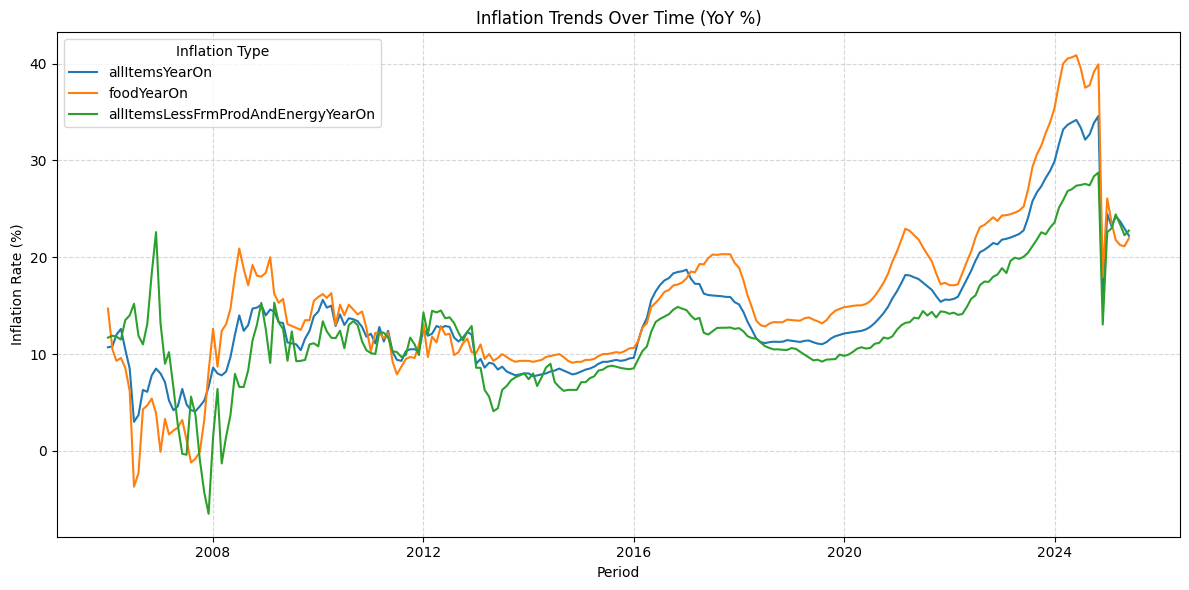

In [40]:
# merged inflation + money supply + oil data
df = merge_df.copy()

# Ensure period is datetime and sorted
df['period'] = pd.to_datetime(df['period'])
df = df.sort_values('period')

inflation_vars = [
    "allItemsYearOn",  # overall inflation
    "foodYearOn",      # food inflation
    "allItemsLessFrmProdAndEnergyYearOn"  # core inflation
]


plt.figure(figsize=(12,6))
for col in inflation_vars:
    plt.plot(df['period'], df[col], label=col)

plt.title("Inflation Trends Over Time (YoY %)")
plt.xlabel("Period")
plt.ylabel("Inflation Rate (%)")
plt.legend(title="Inflation Type")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()




- The inflation line(blue line) shows steady increases from mid-2021 through early 2025 with an over 40% increase since 2008

- Food inflation (yellow line) tends to be higher and more volatile, often driving overall inflation. when there is no equlibrum between supply and demand. e.g more demand chasing fewer goods, this influences demand pull inflation.

- allitemslessfarmproduceandenergy(green line) shows smoother, less upward movement compared to the other lines and this makes sense due to farm produce and energy deductions. As we know farmproduce and energy influences cost push inflation which were all accounted for in the inflation line(Blueline).

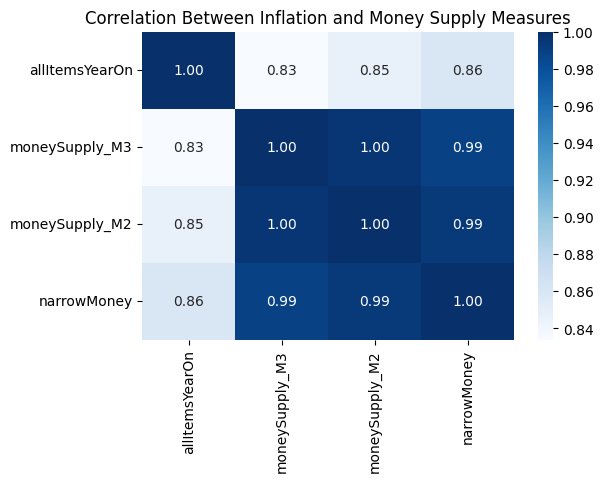

,allItemsYearOn,moneySupply_M3,moneySupply_M2,narrowMoney
allItemsYearOn,1.000000,0.833930,0.846663,0.859750
moneySupply_M3,0.833930,1.000000,0.996277,0.988421
moneySupply_M2,0.846663,0.996277,1.000000,0.993516
narrowMoney,0.859750,0.988421,0.993516,1.000000


In [41]:
corr = df[['allItemsYearOn', 'moneySupply_M3', 'moneySupply_M2', 'narrowMoney']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Between Inflation and Money Supply Measures")
plt.show()

corr



A high positive correlation (close to +1) means the inflation and money supply variables move together. i.e a strong correlation

A low or negative correlation means the relationship between the variables are weak.

from the above the lowest correlation is M3(total liquidity in the economy) correlates with allitemsyearon(inflation) at 0.83 which is still close to 1.00. and several variables having a perfect correlation of 1.0

an increase in money supply leads to an increase in prices of goods and sevices and vise versa

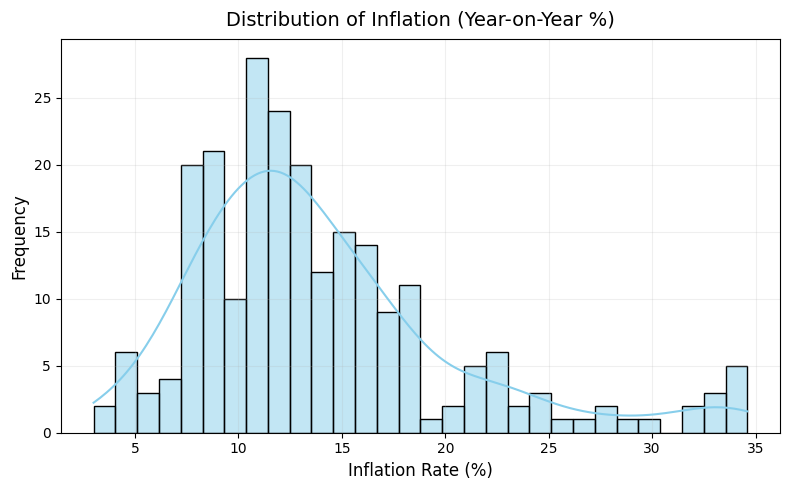

In [42]:
# Distribution of inflation Variable

plt.figure(figsize=(8,5))
sns.histplot(
    merge_df['allItemsYearOn'],
    bins=30,
    kde=True,
    color='skyblue'
)
plt.title("Distribution of Inflation (Year-on-Year %)", fontsize=14, pad=10)
plt.xlabel("Inflation Rate (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()



This is a non symetrical distribution. it shows there is presence of outliers

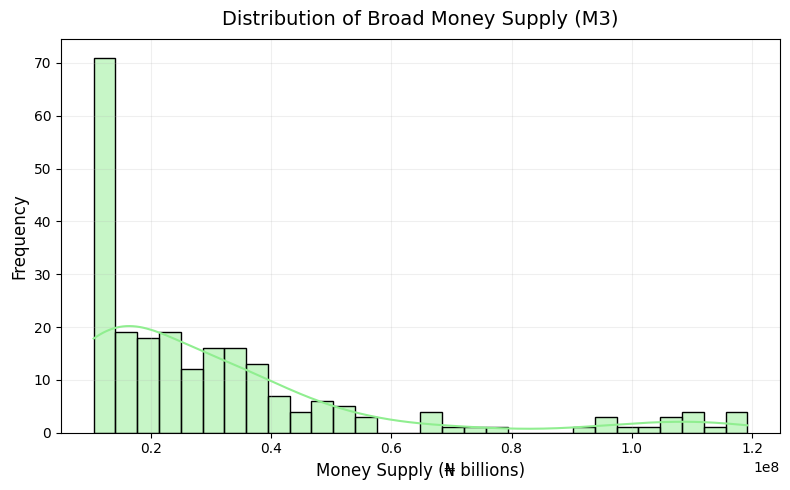

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(
    merge_df['moneySupply_M3'],
    bins=30,
    kde=True,
    color='lightgreen'
)
plt.title("Distribution of Broad Money Supply (M3)", fontsize=14, pad=10)
plt.xlabel("Money Supply (₦ billions)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()



The money supplies shows it is a right skewed distribution with outliers concentrated towards the end.

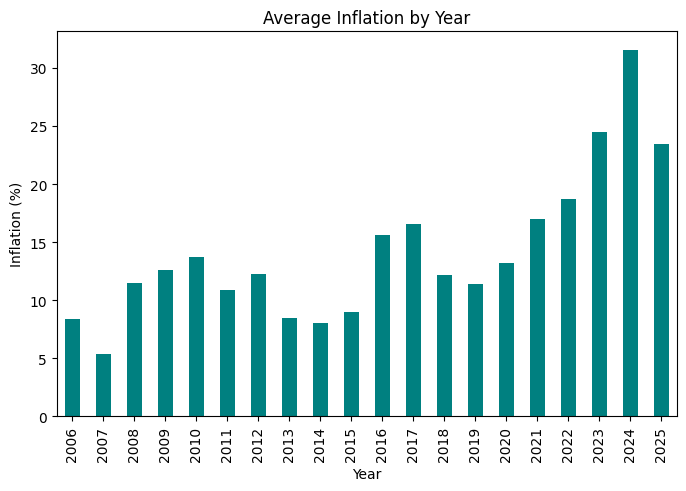

In [44]:
# Average inflation by year
merge_df['year'] = merge_df['period'].dt.year
yearly_inflation = merge_df.groupby('year')['allItemsYearOn'].mean()

yearly_inflation.plot(kind='bar', color='teal', figsize=(8,5))
plt.title("Average Inflation by Year")
plt.ylabel("Inflation (%)")
plt.xlabel("Year")
plt.show()


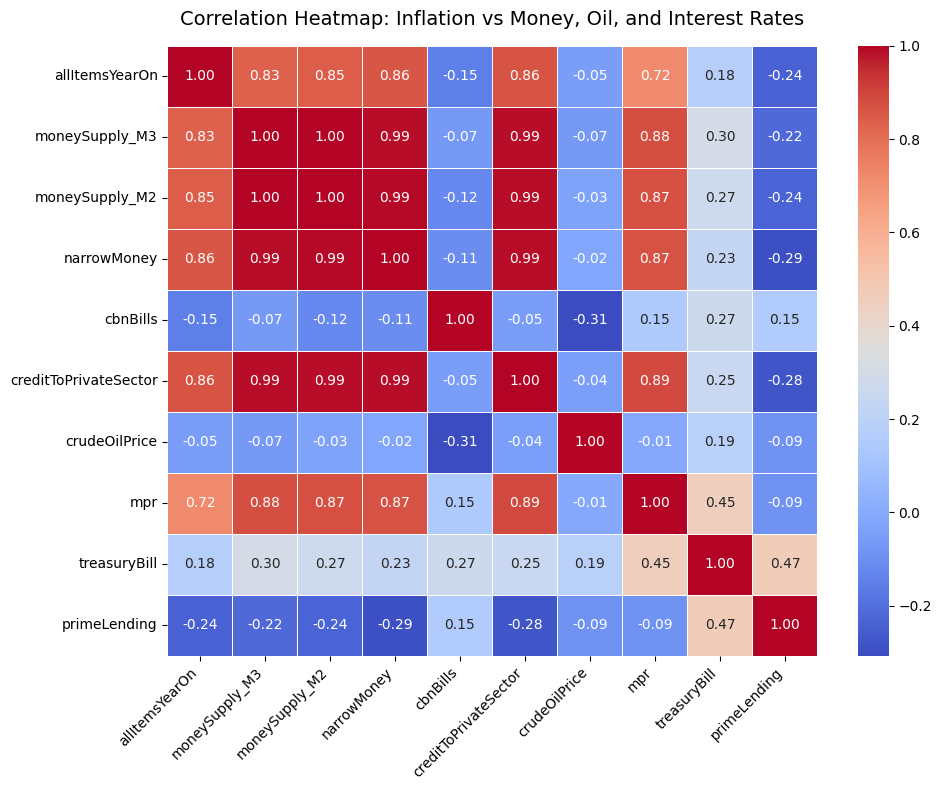

In [45]:
selected_cols = [
    'allItemsYearOn', 'moneySupply_M3', 'moneySupply_M2', 'narrowMoney',
    'cbnBills', 'creditToPrivateSector', 'crudeOilPrice',
    'mpr', 'treasuryBill', 'primeLending'
]

corr_matrix = merge_df[selected_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.4)
plt.title("Correlation Heatmap: Inflation vs Money, Oil, and Interest Rates", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The correlation heatmap (Inflation vs Money, Oil, and Interest Rates) spots which variables are positively or negatively correlated with inflation.

In [46]:
# Summary statistics of numerical features, gives insights into mean, min, max, quartiles...etc
merge_df.describe()

,tyear_x,tmonth_x,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,...,sixMonthsDeposit,twelveMonthsDeposit,primeLending,maxLending,day,quater,week_of_year,day_of_week,day_of_year,year
count,234.000000,234.000000,234,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,234.000000,234.000000,234.0,234.000000,234.0,234.000000,234.000000,234.000000
mean,2015.256410,6.423077,2015-09-16 03:23:04.615384576,13.991325,13.852222,15.416410,15.368718,12.439957,12.115812,12.210855,...,8.795598,8.513803,15.993932,25.722009,1.0,2.474359,26.038462,3.038462,165.371795,2015.256410
min,2006.000000,1.000000,2006-01-01 00:00:00,3.000000,5.400000,-3.700000,1.500000,0.500000,4.300000,-6.500000,...,2.650000,3.530000,11.130000,17.170000,1.0,1.000000,1.0,0.000000,1.000000,2006.000000
25%,2010.000000,3.000000,2010-11-08 12:00:00,9.425000,10.120000,10.000000,10.325000,8.900000,9.155000,9.270000,...,6.800000,6.180000,15.155000,22.770000,1.0,1.000000,13.0,1.000000,61.000000,2010.000000
50%,2015.000000,6.000000,2015-09-16 00:00:00,12.400000,12.600000,14.045000,14.395000,11.500000,11.390000,11.700000,...,9.430000,8.215000,16.545000,26.730000,1.0,2.000000,26.0,3.000000,153.000000,2015.000000
75%,2020.000000,9.000000,2020-07-24 06:00:00,16.212500,16.530000,19.130000,18.880000,14.650000,13.590000,14.037500,...,10.555000,10.555000,17.107500,29.030000,1.0,3.000000,39.0,5.000000,245.000000,2020.000000
max,2025.000000,12.000000,2025-06-01 00:00:00,34.600000,32.770000,40.870000,38.670000,27.870000,25.910000,28.750000,...,16.590000,16.930000,19.660000,31.560000,1.0,4.000000,53.0,6.000000,336.000000,2025.000000
std,5.644936,3.458593,NaN,6.443260,5.924726,8.095886,7.464412,5.345692,4.662075,5.705581,...,2.875060,2.774075,1.998874,4.166017,0.0,1.120136,15.184227,2.002845,105.272845,5.644936


2. MODEL PROCESSING AND TRAINING

In [47]:
len(merge_df)

234

In [48]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   tyear_x                             234 non-null    int64         
 1   tmonth_x                            234 non-null    int64         
 2   period                              234 non-null    datetime64[ns]
 3   allItemsYearOn                      234 non-null    float64       
 4   allItemsAverage                     234 non-null    float64       
 5   foodYearOn                          234 non-null    float64       
 6   foodAverage                         234 non-null    float64       
 7   allItemsLessFrmProdYearOn           234 non-null    float64       
 8   allItemsLessFrmProdAverage          234 non-null    float64       
 9   allItemsLessFrmProdAndEnergyYearOn  234 non-null    float64       
 10  allItemsLessFrmProdAndEner

In [49]:
# onehot encode the categorical column (preprocessing)
merge_df = pd.get_dummies(merge_df, columns=["month_name"], drop_first=True)

In [50]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   tyear_x                             234 non-null    int64         
 1   tmonth_x                            234 non-null    int64         
 2   period                              234 non-null    datetime64[ns]
 3   allItemsYearOn                      234 non-null    float64       
 4   allItemsAverage                     234 non-null    float64       
 5   foodYearOn                          234 non-null    float64       
 6   foodAverage                         234 non-null    float64       
 7   allItemsLessFrmProdYearOn           234 non-null    float64       
 8   allItemsLessFrmProdAverage          234 non-null    float64       
 9   allItemsLessFrmProdAndEnergyYearOn  234 non-null    float64       
 10  allItemsLessFrmProdAndEner

In [51]:
merge_df.to_csv('/content/drive/MyDrive/merge_data.csv', index=False)


In [52]:
merge_df.drop("period", axis=1, inplace=True)

We split the data first into train set, validation set and test set using train_test split.

The process is
1. import train_test-split from scikit-learn
2. train_size=170 tells train_test_split() exactly how many rows to use for training.

3. The remaining 64 rows go into temp_df.

4. Then, that temp_df is split into 30 (validation) and 34 (test).

5. random_state=42 ensures reproducibility.

6. shuffle=True ensures the split is randomized.

In [53]:
from sklearn.model_selection import train_test_split

# Split into train (170) and temp (64 = 30 + 34)
train_df, temp_df = train_test_split(merge_df, train_size=170, random_state=42, shuffle=True)

# Split the temp set into validation (30) and test (34)
val_df, test_df = train_test_split(temp_df, test_size=34, random_state=42, shuffle=True)

# Check sizes
print(f"Train set: {len(train_df)}")
print(f"Validation set: {len(val_df)}")
print(f"Test set: {len(test_df)}")


Train set: 170
Validation set: 30
Test set: 34


In [54]:
train_df.head(2)

,tyear_x,tmonth_x,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,allItemsLessFrmProdAndEnergyAvg,...,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
67,2019,11,11.85,11.35,14.48,13.65,8.99,9.19,9.48,9.8,...,False,False,False,False,False,False,False,True,False,False
217,2007,5,4.60,6.00,2.40,2.20,4.60,11.50,2.70,12.1,...,False,False,False,False,False,False,True,False,False,False


In [55]:
val_df.head(2)

,tyear_x,tmonth_x,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,allItemsLessFrmProdAndEnergyAvg,...,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
86,2018,4,12.48,15.2,14.8,18.89,10.92,12.02,11.64,12.38,...,False,False,False,False,False,False,False,False,False,False
220,2007,2,7.10,7.7,3.3,3.90,11.00,14.00,9.00,13.70,...,False,True,False,False,False,False,False,False,False,False


In [56]:
test_df.head(2)

,tyear_x,tmonth_x,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,allItemsLessFrmProdAndEnergyAvg,...,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
162,2011,12,10.30,10.80,11.00,10.30,10.80,11.70,9.90,10.70,...,True,False,False,False,False,False,False,False,False,False
38,2022,4,16.82,16.45,18.37,18.88,14.18,13.68,14.14,14.12,...,False,False,False,False,False,False,False,False,False,False


I'm going to use randomforest for training because it performs well on small to medium dataset. Xgboost is equally good but might overefit and performs better on larger data set.

In [57]:
# split training, validation and test data into x_train and y_train
x_train = train_df.drop("allItemsYearOn", axis=1)
y_train = train_df["allItemsYearOn"]

x_val = val_df.drop("allItemsYearOn", axis=1)
y_val = val_df["allItemsYearOn"]

x_test = test_df.drop("allItemsYearOn", axis=1)
y_test = test_df["allItemsYearOn"]

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor (default runs on CPU)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  # n_jobs=-1 uses all CPU cores

In [59]:
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [60]:
# score the model on training data
random_forest_model.score(x_train, y_train)

0.9955263722174332

In [61]:
# score RF model perfromance
random_forest_model.score(x_val, y_val)

0.9830015786086911

3. Model evaluation

In [62]:
# Create evaluation function (Root Mean Square Log Error)
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error

# Create function to evaluate our model
def show_scores(model,
                train_features=x_train,
                train_labels=y_train,
                valid_features=x_val,
                valid_labels=y_val):

    # Make predictions on train and validation features
    train_preds = model.predict(train_features)
    val_preds = model.predict(valid_features)

    # Create a scores dictionary of different evaluation metrics
    scores = {"Training MAE": mean_absolute_error(y_true=train_labels,
                                                  y_pred=train_preds),
              "Valid MAE": mean_absolute_error(y_true=valid_labels,
                                               y_pred=val_preds),
              "Training RMSLE": root_mean_squared_log_error(y_true=train_labels,
                                                            y_pred=train_preds),
              "Valid RMSLE": root_mean_squared_log_error(y_true=valid_labels,
                                                         y_pred=val_preds),
              "Training R^2": model.score(X=train_features,
                                          y=train_labels),
              "Valid R^2": model.score(X=valid_features,
                                       y=valid_labels)}
    return scores

In [63]:
model_scores = show_scores(model=random_forest_model)

In [64]:
model_scores

{'Training MAE': 0.22356117647058915,
 'Valid MAE': 0.7118899999999985,
 'Training RMSLE': 0.04257315497087074,
 'Valid RMSLE': 0.0837044396915385,
 'Training R^2': 0.9955263722174332,
 'Valid R^2': 0.9830015786086911}

| Metric                                  | Train | Validation | What It Means                                                                                                                             |
| :-------------------------------------- | :---- | :--------- | :---------------------------------------------------------------------------------------------------------------------------------------- |
| **MAE (Mean Absolute Error)**           | 0.22  | 0.71       | The model’s predictions are off by about **0.7 units** on the validation set. Smaller = better.                              |
| **RMSLE (Root Mean Squared Log Error)** | 0.04  | 0.08       | Very small values shows predictions are **close to the actuals values**. |
| **R² (Coefficient of Determination)**   | 0.995 | 0.983      | Both are **high**, meaning the model explains **98%+ of the variance** in inflation.                            |

Remeber our POC(Proof of Concept) --->  is if we can reach a coeffecient of determination(R squared) between 0.7 and 0.8, we will pursue this project. The R squared is at 0.9 meaning project will be deployed and made public.

# NEXT is
4. Model comparison: i used one model because of computation time and i think Randomforest is prefarable for medium dataset.

5. Model hyperparameter tuning: Once we've found a good model, can we tweak its hyperparameters to improve it?

6. Crossvalidation


In [65]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rs_model = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rs_model.fit(x_train, y_train)



Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_p

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2', verbose=1)

In [66]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [67]:
from sklearn.model_selection import GridSearchCV

# Refine parameter grid around the best parameters
param_grid = {
    'n_estimators': [150, 200, 250],             # around 200
    'min_samples_split': [2, 3, 4],              # around 2
    'min_samples_leaf': [1, 2],                  # around 1
    'max_features': ['sqrt', 0.5, 0.6],          # explore sqrt and numeric
    'max_depth': [None, 15, 20],                 # include None (no limit)
    'max_samples': [0.75, 0.9, 1.0]              # sample fractions
}

# Initialize the model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_log_error',  # RMSLE for better relative accuracy
    n_jobs=-1,
    cv=3,
    verbose=2
)

# Fit GridSearchCV
print("[INFO] Running refined Grid Search...")
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSLE Score:", -grid_search.best_score_)

[INFO] Running refined Grid Search...
Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best Parameters: {'max_depth': None, 'max_features': 0.6, 'max_samples': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best RMSLE Score: 0.09419050436203853


In [68]:
grid_search.score(x_val, y_val)

-0.08642041026384763

In [69]:
abs(grid_search.score(x_val, y_val)) # Absolute value

0.08642041026384763

In [70]:
# Comparing models prediction Vs true values
# lets compare model prediction vs true values in a dF
model_prediction = grid_search.predict(x_val)

In [71]:
# model prediction vs true value dict
compare_with_true_value = {
    "Model prediction": model_prediction,
    "True values": y_val
}

In [72]:
# Enveloped in a DataFrame
compare_with_true_value_df = pd.DataFrame(compare_with_true_value)

In [73]:
compare_with_true_value_df

,Model prediction,True values
86,11.94084,12.48
220,6.37880,7.10
82,11.41024,11.23
55,14.82608,14.89
45,16.33108,16.63
73,11.34856,11.40
229,9.65844,10.50
16,29.57652,31.70
18,28.03896,28.92
60,12.80712,12.56


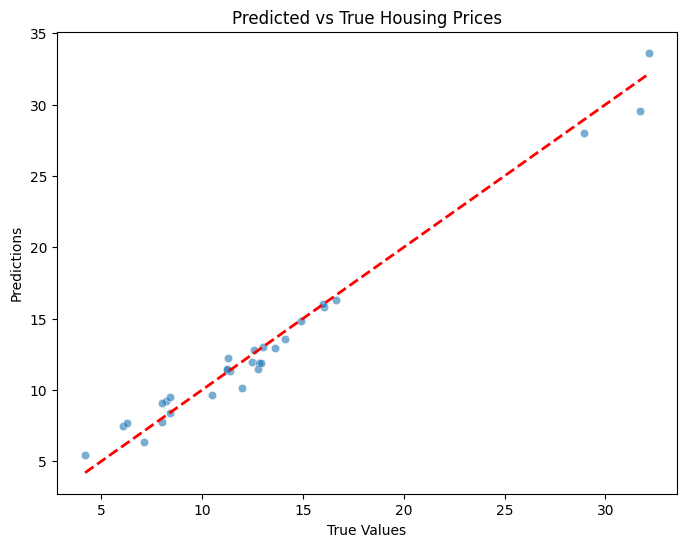

In [74]:
# Visualize predicted vs True values on a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_val, y=model_prediction, alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', linewidth=2)  # Perfect line
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predicted vs True Housing Prices")
plt.show()

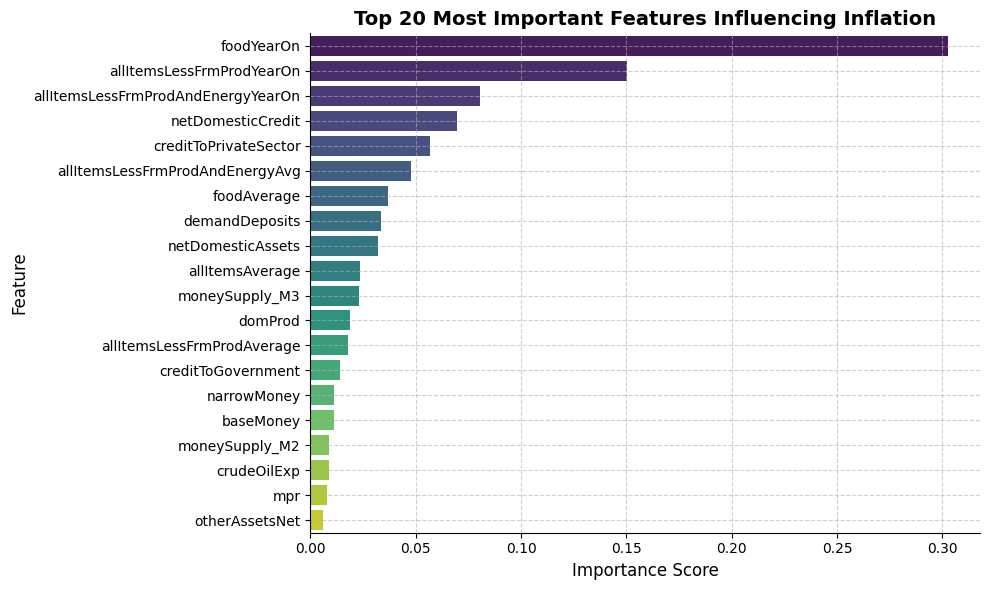


Full Feature Importance Table:
                               Feature  Importance
3                           foodYearOn    0.302668
5            allItemsLessFrmProdYearOn    0.150446
7   allItemsLessFrmProdAndEnergyYearOn    0.080719
20                   netDomesticCredit    0.069788
24               creditToPrivateSector    0.057044
..                                 ...         ...
59                  month_name_October    0.000018
58                 month_name_November    0.000012
52                 month_name_February    0.000009
56                    month_name_March    0.000004
44                                 day    0.000000

[61 rows x 2 columns]


In [75]:
# feature importances from fitted RandomForest model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
importances = grid_search.best_estimator_.feature_importances_
feature_names = x_train.columns

# Create a DataFrame and sort
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=feat_imp_df.head(20),
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='viridis',
    legend=False
)

plt.title("Top 20 Most Important Features Influencing Inflation", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()

# showing full importance table
print("\nFull Feature Importance Table:")
print(feat_imp_df)


Testing Model predictions on unseen data

In [76]:
y_test

,allItemsYearOn
162,10.30
38,16.82
69,11.24
199,14.80
109,15.58
164,10.50
19,28.20
227,3.00
25,22.41
171,12.80


In [77]:
model_prediction = grid_search.predict(x_test)

In [78]:
model_prediction

array([11.113  , 16.55576, 11.36324, 14.20008, 13.0942 , 11.00688,
       26.61284,  7.92716, 22.71252, 12.0074 , 10.39144, 32.202  ,
       12.03308, 21.43504,  8.4198 , 12.00484, 34.03816, 10.20752,
       10.58036,  4.9596 , 13.61604,  8.13   ,  8.2212 ,  9.22684,
       23.59644, 15.17272, 12.83748, 16.25292, 12.11952,  9.93592,
       17.9764 , 11.76696,  9.52984, 14.82128])

In [79]:
model_prediction_df = pd.DataFrame(model_prediction, columns=["Model Prediction"])

In [80]:
model_prediction_df

,Model Prediction
0,11.11300
1,16.55576
2,11.36324
3,14.20008
4,13.09420
5,11.00688
6,26.61284
7,7.92716
8,22.71252
9,12.00740


In [81]:
model_prediction_df["True Values"] = y_test.values

In [82]:
model_prediction_df

,Model Prediction,True Values
0,11.11300,10.30
1,16.55576,16.82
2,11.36324,11.24
3,14.20008,14.80
4,13.09420,15.58
5,11.00688,10.50
6,26.61284,28.20
7,7.92716,3.00
8,22.71252,22.41
9,12.00740,12.80


In [83]:
import joblib
joblib.dump(grid_search.best_estimator_, "/content/drive/MyDrive/inflation_model.pkl")


['/content/drive/MyDrive/inflation_model.pkl']

In [84]:
!pip install streamlit

In [85]:
%%writefile inflation_inference_app.py
import streamlit as st
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

st.set_page_config(page_title="Inflation Inference", layout="wide")

# --- Typing animation ---
def typing_effect(text, delay=0.03, size="###"):
    placeholder = st.empty()
    typed_text = ""
    for char in text:
        typed_text += char
        placeholder.markdown(f"{size} {typed_text}")
        time.sleep(delay)
    time.sleep(0.5)

# --- Title ---
st.title("📈 Inflation Inference")

# --- Intro with typing effect ---
intro = (
    "This project involves merging Inflation, crude oil, MPR, money supply, etc., for descriptive "
    "and inferential analysis on price of goods and services in Nigeria, enabling "
    "data-driven decision-making to achieve macroeconomic goals.\n\n"
    "It explores relationships among variables to guide contractionary and expansionary "
    "monetary policies.\n\n"
    "Note that stochastic factors like disease outbreaks or wars can affect model accuracy. "
    "Exchange rate data were excluded due to limited availability from CBN.\n\n"
    "Machine learning algorithms perform better with more data."
)
typing_effect(intro, delay=0.01)

# --- Data Sources ---
typing_effect("Data Sources", size="###")
st.markdown("""
- **Inflation data:** [Inflation Rate (CBN)](https://www.cbn.gov.ng/rates/inflrates.html)
- **Money supply:** [Money and Credit Statistics](https://www.cbn.gov.ng/rates/mnycredit.html)
- **Crude Oil:** [Crude Oil Price](https://www.cbn.gov.ng/rates/crudeoil.html)
- **Money Market:** [Money Market Indicators](https://www.cbn.gov.ng/rates/mnymktind.html)
""")

st.divider()

# --- Data Dictionary Section ---
with st.expander(" Data Dictionary (Click to Expand)"):
    typing_effect("Inflation Variables (from NBS CPI data)", size="###")
    st.markdown("""
    | Variable | Description | Unit / Meaning |
    |-----------|--------------|----------------|
    | **allItemsYearOn** | YoY % change in CPI for all items. | % |
    | **foodYearOn** | YoY % change in CPI for food items. | % |
    | **allItemsLessFrmProdAndEnergyYearOn** | Core inflation (excluding farm produce and energy). | % |
    """)

    typing_effect("Money Supply Variables (from CBN data)", size="###")
    st.markdown("""
    | Variable | Description | Unit |
    |-----------|--------------|------|
    | **moneySupply_M3** | Broadest money supply (M2 + other liquid assets). | ₦ billions |
    | **moneySupply_M2** | Broad money. | ₦ billions |
    | **narrowMoney** | Currency + demand deposits. | ₦ billions |
    | **creditToPrivateSector** | Credit to private sector. | ₦ billions |
    | **cbnBills** | CBN-issued securities. | ₦ billions |
    """)

st.divider()
typing_effect("Exploratory Data Analysis", size="##")

# --- Load Data ---
merge_df = pd.read_csv("merge_data.csv")
merge_df["period"] = pd.to_datetime(merge_df["period"])
merge_df = merge_df.sort_values("period")

# Add download buttons for data
st.download_button(
    label="⬇️ Download Merged Data (CSV)",
    data=merge_df.to_csv(index=False).encode("utf-8"),
    file_name="merge_data.csv",
    mime="text/csv"
)

# spacing
st.divider()

# --- Inflation Trend Plot ---
inflation_vars = ["allItemsYearOn", "foodYearOn", "allItemsLessFrmProdAndEnergyYearOn"]
fig, ax = plt.subplots(figsize=(12,6))
for col in inflation_vars:
    ax.plot(merge_df["period"], merge_df[col], label=col)
ax.set_title("Inflation Trends Over Time (YoY %)")
ax.set_xlabel("Period")
ax.set_ylabel("Inflation Rate (%)")
ax.legend(title="Inflation Type")
st.pyplot(fig)

typing_effect(
    "🟦 Overall inflation shows steady increases from mid-2021 with over 40% growth since 2008. "
    "\n🟨 Food inflation is more volatile and higher — often driving overall inflation (demand-pull). "
    "\n🟩 Core inflation is smoother since it excludes farm produce and energy (cost-push).",
    delay=0.01
)

# --- Correlation Heatmap ---
corr = merge_df[["allItemsYearOn", "moneySupply_M3", "moneySupply_M2", "narrowMoney"]].corr()
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", ax=ax)
st.pyplot(fig)
typing_effect("💡 High positive correlation (close to +1) → strong relationship between money supply and inflation.", delay=0.02)

# --- Distribution Plots ---
typing_effect("📈 Distribution of Inflation", size="###")
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(merge_df["allItemsYearOn"], bins=30, kde=True, color="skyblue", ax=ax)
st.pyplot(fig)
typing_effect("Non-symmetrical distribution → presence of outliers.", delay=0.02)

typing_effect("💵 Distribution of Broad Money Supply (M3)", size="###")
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(merge_df["moneySupply_M3"], bins=30, kde=True, color="lightgreen", ax=ax)
st.pyplot(fig)
typing_effect("Right-skewed distribution → concentration of outliers at the end.", delay=0.02)

# --- Model Section ---
st.divider()
typing_effect("🤖 Inflation Prediction Model", size="##")

# ✅ Load your GridSearchCV model instead of single model
grid_search = joblib.load("inflation_model.pkl")  # <-- model name

# Extract the best estimator (trained model)
model = grid_search.best_estimator_

# Load test data
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")

# Add download buttons for test datasets
col1, col2 = st.columns(2)
with col1:
    st.download_button(
        label="⬇️ Download x_test (CSV)",
        data=x_test.to_csv(index=False).encode("utf-8"),
        file_name="x_test.csv",
        mime="text/csv"
    )
with col2:
    st.download_button(
        label="⬇️ Download y_test (CSV)",
        data=y_test.to_csv(index=False).encode("utf-8"),
        file_name="y_test.csv",
        mime="text/csv"
    )

# Predict and display results
model_prediction = model.predict(x_test)
model_prediction_df = pd.DataFrame(model_prediction, columns=["Model Prediction"])
model_prediction_df["True Values"] = y_test.values
st.write(model_prediction_df.head())

# Download predictions
csv = model_prediction_df.to_csv(index=False).encode("utf-8")
st.download_button(
    label="📥 Download Predictions (CSV)",
    data=csv,
    file_name="inflation_predictions.csv",
    mime="text/csv"
)

# --- Model Performance Info ---
typing_effect(
    f"🏆 Best model: **{type(model).__name__}**\n\n"
    f"Best parameters: `{grid_search.best_params_}`",
    delay=0.015
)

# --- Feature Importance ---
typing_effect("💡 Feature Importance in Predicting Inflation", size="###")
importances = model.feature_importances_
features = x_test.columns
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=importances, y=features, hue=features, palette="viridis", legend=False, ax=ax)
st.pyplot(fig)


Writing inflation_inference_app.py


In [86]:
!ls /content


drive		     inflation_inference_app.py  sample_data
inflation-dashboard  merge_df.csv


In [87]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/inflation_inference_app.py /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
merge_df.to_csv("merge_data.csv", index=False)
x_test.to_csv("x_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


In [89]:
import shutil

# Define Google Drive destination
drive_path = "/content/drive/MyDrive/"

# Copy the CSV files
shutil.copy("merge_data.csv", drive_path)
shutil.copy("x_test.csv", drive_path)
shutil.copy("y_test.csv", drive_path)

print("Files successfully copied to Google Drive:")
!ls -lh /content/drive/MyDrive | grep -E "merge_data|x_test|y_test"


Files successfully copied to Google Drive:
-rw------- 1 root root  95K Oct  8 10:24 merge_data.csv
-rw------- 1 root root  15K Oct  8 10:24 x_test.csv
-rw------- 1 root root  187 Oct  8 10:24 y_test.csv


In [90]:
import os, shutil

base_path = "/content/drive/MyDrive/inflation_app"
os.makedirs(base_path, exist_ok=True)

files_to_move = [
    "inflation_inference_app.py",
    "grid_search_model.pkl",
    "merge_data.csv",
    "x_test.csv",
    "y_test.csv"
]

for f in files_to_move:
    if os.path.exists(f):
        shutil.move(f, base_path)

print("✅ Files organized in:", base_path)


Error: Destination path '/content/drive/MyDrive/inflation_app/inflation_inference_app.py' already exists

In [ ]:
%%writefile /content/drive/MyDrive/inflation_app/requirements.txt
streamlit
pandas
numpy
matplotlib
seaborn
scikit-learn
joblib
